In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from tqdm import tqdm


datasetsFilePath = "datasets/"
savesFilePath = "saves/"

## 한국어 감정 정보가 포함된 단발성 대화 데이터셋
**파일** : ['single_train.xlsx'](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=120&topMenu=100&aihubDataSe=extrldata&dataSetSn=270)

In [2]:
single_df = pd.read_excel(f'{datasetsFilePath}single_train.xlsx')
single_df.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0


In [3]:
single_df = single_df.iloc[:,:2]
single_df.head()
single_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB


In [4]:
single_df.rename(columns={'Sentence':'발화','Emotion':'감정'},inplace=True)
single_df["감정"].unique()

array(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'], dtype=object)

In [5]:
single_df=single_df[single_df["감정"] != '놀람']
single_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32696 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발화      32696 non-null  object
 1   감정      32696 non-null  object
dtypes: object(2)
memory usage: 766.3+ KB


In [6]:
single_df['감정']=np.where(single_df['감정'].str.match('공포'),"불안",single_df['감정'])
single_df.info()
single_df['감정'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 32696 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발화      32696 non-null  object
 1   감정      32696 non-null  object
dtypes: object(2)
memory usage: 766.3+ KB


감정
행복    6037
분노    5665
불안    5468
혐오    5429
슬픔    5267
중립    4830
Name: count, dtype: int64

## 감성대화 말뭉치
파일 : ['corpus_train_1.xlsx','corpus_train_2.xlsx'](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86)

In [7]:
ori_1_df = pd.read_excel(f'{datasetsFilePath}corpus_train_1.xlsx',index_col=0)
ori_2_df = pd.read_excel(f'{datasetsFilePath}corpus_train_2.xlsx',index_col=0)
display(ori_1_df.head(3))
display(ori_2_df.head(3))

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
1,청년,남성,"진로,취업,직장",해당없음,불안,두려운,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,실수하시다니 정말 미안한 마음이 크겠어요.,내 능력이 부족한 거 같은데 그만 다녀야 될거같아.,능력을 올리려면 어떤 방법이 있을까요?,퇴근 후 여가에 회사 일을 더 열심히 해서 피해가 가지 않도록 해야겠어.,꼭 좋은 결과 있길 바라요.
2,청년,남성,"진로,취업,직장",해당없음,불안,두려운,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.,큰 프로젝트를 혼자 하셔서 고민이 많겠네요.,나에게 너무 크게 느껴지는 중요한 프로젝트라 버거운 느낌이 들어.,프로젝트를 잘하시기 위해서 어떤 걸 할 수 있나요?,동료 직원에게 도움을 요청해서 같이 해결해야겠어.,동료 직원에게 도움을 요청하기로 하셨군요.
3,청년,남성,"진로,취업,직장",해당없음,불안,두려운,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.,직장 상사가 무섭게 생기셔서 친해지는 게 어렵군요.,무섭게 생겼는데도 업무를 보려면 친해져야 할 것 같단말이야.,상사분과 친해질 수 있는 방법은 무엇이 있을까요?,먼저 다가가서 말을 걸어볼게.,직장 상사와 친해지시면 좋겠네요.


,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN


In [8]:
ori_1_df = ori_1_df.fillna("")
ori_2_df = ori_2_df.fillna("")

In [9]:
ori_1_df["사람문장"] = ori_1_df["사람문장1"].astype(str) + ori_1_df["사람문장2"].astype(str) + ori_1_df["사람문장3"].astype(str)
ori_2_df["사람문장"] = ori_2_df["사람문장1"].astype(str) + ori_2_df["사람문장2"].astype(str) + ori_2_df["사람문장3"].astype(str)
corpus_df = pd.concat([ori_1_df,ori_2_df])
display(corpus_df.head(5))
corpus_df.info()

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3,사람문장
1,청년,남성,"진로,취업,직장",해당없음,불안,두려운,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,실수하시다니 정말 미안한 마음이 크겠어요.,내 능력이 부족한 거 같은데 그만 다녀야 될거같아.,능력을 올리려면 어떤 방법이 있을까요?,퇴근 후 여가에 회사 일을 더 열심히 해서 피해가 가지 않도록 해야겠어.,꼭 좋은 결과 있길 바라요.,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
2,청년,남성,"진로,취업,직장",해당없음,불안,두려운,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.,큰 프로젝트를 혼자 하셔서 고민이 많겠네요.,나에게 너무 크게 느껴지는 중요한 프로젝트라 버거운 느낌이 들어.,프로젝트를 잘하시기 위해서 어떤 걸 할 수 있나요?,동료 직원에게 도움을 요청해서 같이 해결해야겠어.,동료 직원에게 도움을 요청하기로 하셨군요.,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.나에게 너무 크게...
3,청년,남성,"진로,취업,직장",해당없음,불안,두려운,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.,직장 상사가 무섭게 생기셔서 친해지는 게 어렵군요.,무섭게 생겼는데도 업무를 보려면 친해져야 할 것 같단말이야.,상사분과 친해질 수 있는 방법은 무엇이 있을까요?,먼저 다가가서 말을 걸어볼게.,직장 상사와 친해지시면 좋겠네요.,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.무섭게 생겼는데도 업무를 보려면...
4,청년,남성,"진로,취업,직장",해당없음,불안,두려운,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.,첫 직장이라서 정말 떨리시고 긴장되실 것 같아요.,첫 직장이어서 잘 적응을 할 수 있을지 모르겠어.,잘 적응 하시려면 무엇을 할 수 있을까요?,직장 동료와 상사들이랑 친하게 지내야겠어.,직장에 잘 적응하시길 바라요.,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.첫 직장이...
5,청년,남성,"진로,취업,직장",해당없음,불안,두려운,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.,직장 사람들 관계에 대해서 고민이시군요.,내가 낯가림이 심해서 친해질 수 있을지 모르겠어.,직장 사람들과 친해지려면 무슨 방법이 있을까요?,서로 같은 취미를 공유하고 얘기를 나누다 보면 친해질 수 있을 거 같아.,직장 사람들과 좋은 관계를 가지시길 응원해요.,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.내가 낯가림이 심해서 친해질 수 ...


<class 'pandas.core.frame.DataFrame'>
Index: 58271 entries, 1 to 51630
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령      58271 non-null  object
 1   성별      58271 non-null  object
 2   상황키워드   58271 non-null  object
 3   신체질환    58271 non-null  object
 4   감정_대분류  58271 non-null  object
 5   감정_소분류  58271 non-null  object
 6   사람문장1   58271 non-null  object
 7   시스템문장1  58271 non-null  object
 8   사람문장2   58271 non-null  object
 9   시스템문장2  58271 non-null  object
 10  사람문장3   58271 non-null  object
 11  시스템문장3  58271 non-null  object
 12  사람문장    58271 non-null  object
dtypes: object(13)
memory usage: 6.2+ MB


In [10]:
corpus_df = corpus_df[["사람문장","감정_대분류"]]

In [11]:
corpus_df= corpus_df.rename({"감정_대분류":"감정"},axis=1)

In [12]:
corpus_df["감정"] = corpus_df["감정"].apply(lambda x:x.strip())

In [13]:
corpus_df["감정"].value_counts()

감정
불안    10433
분노    10417
상처    10150
슬픔    10128
당황     9804
기쁨     7339
Name: count, dtype: int64

In [14]:
corpus_df["감정"]=np.where(corpus_df["감정"].str.match("상처"),"슬픔",corpus_df["감정"])
corpus_df["감정"]=np.where(corpus_df["감정"].str.match("기쁨"),"행복",corpus_df["감정"])

In [15]:
corpus_df=corpus_df.reset_index(drop=True)

In [16]:
corpus_df.rename({"사람문장":"발화"},axis=1,inplace=True)

In [17]:
display(corpus_df.head(5))
corpus_df.info()

,발화,감정
0,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...,불안
1,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워.나에게 너무 크게...,불안
2,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워.무섭게 생겼는데도 업무를 보려면...,불안
3,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다.첫 직장이...,불안
4,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼.내가 낯가림이 심해서 친해질 수 ...,불안


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58271 entries, 0 to 58270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발화      58271 non-null  object
 1   감정      58271 non-null  object
dtypes: object(2)
memory usage: 910.6+ KB


## 한국어 감정 정보 연속적 대화 데이터셋
파일 : ['dialogue_train.xlsx'](https://aihub.or.kr/aihubdata/data/view.do?dataSetSn=271)

In [18]:
dialogue_df = pd.read_excel(f'{datasetsFilePath}dialogue_train.xlsx')
dialogue_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,행복,중립,슬픔,공포,혐오,분노,놀람
0,dialog #,발화,감정,NaN,NaN,1030.0,NaN,NaN,NaN,NaN,NaN,NaN
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,손님 왔어요.,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,손님? 누구?,중립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
columns = dialogue_df.iloc[0]
dialogue_df = dialogue_df.rename(columns=columns).iloc[:,1:3]
dialogue_df.drop(index=0,axis=0,inplace=True)
dialogue_df.head()

,발화,감정
1,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,손님 왔어요.,중립
4,손님? 누구?,중립
5,몰라요. 팀장님 친구래요.,중립


In [20]:
dialogue_df["감정"].value_counts()

감정
중립     43786
놀람      4866
분노      3628
슬픔      1972
행복      1030
혐오       220
공포        98
ㅍ         12
분          4
ㅈ중립        1
중림         1
분ㄴ         1
ㄴ중립        1
줄          1
Name: count, dtype: int64

In [21]:
dialogue_df = dialogue_df[dialogue_df["감정"].isin(["중립","놀람","분노","슬픔","행복","혐오","공포"])]

In [22]:
dialogue_df["감정"]=np.where(dialogue_df["감정"].str.match("놀람"),"당황",dialogue_df["감정"])
dialogue_df["감정"]=np.where(dialogue_df["감정"].str.match("공포"),"불안",dialogue_df["감정"])

## 전처리한 데이터셋 합치기

In [23]:
final_df = pd.concat([single_df,corpus_df,dialogue_df])
final_df['감정'].value_counts()

감정
중립    48616
슬픔    27517
분노    19710
불안    15999
당황    14670
행복    14406
혐오     5649
Name: count, dtype: int64

In [24]:
final_df.reset_index(drop=True,inplace=True)
display(final_df)

,발화,감정
0,언니 동생으로 부르는게 맞는 일인가요..??,불안
1,그냥 내 느낌일뿐겠지?,불안
2,아직너무초기라서 그런거죠?,불안
3,유치원버스 사고 낫다던데,불안
4,근데 원래이런거맞나요,불안
...,...,...
146562,얘긴 다 끝났냐? 원예부,중립
146563,"예. 그거 때문에, 부탁이 있......는......데요.",중립
146564,여자 숨겨달라는거면 사절이다.,중립
146565,아무래도 안되나요?,중립


In [25]:
str_lens = []
for i in tqdm(range(len(final_df))):
    text = final_df.iloc[i,0]
    str_len = len(text)
    str_lens.append(str_len)
final_df["str_len"] = str_lens

100%|███████████████████████████████████████████████████████████████████████| 146567/146567 [00:03<00:00, 48271.29it/s]


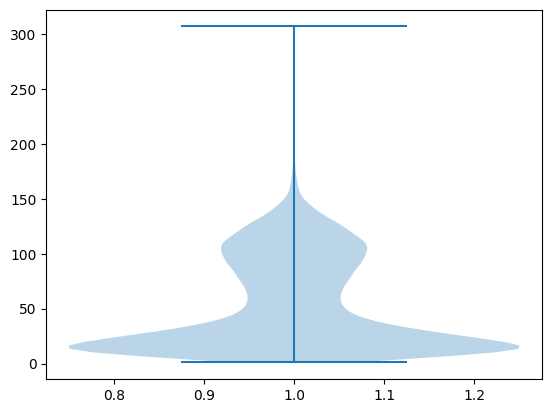

In [26]:
from matplotlib import pyplot as plt
plt.violinplot(final_df["str_len"])
plt.show()

In [27]:
final_df = final_df[final_df["str_len"] <= 128]

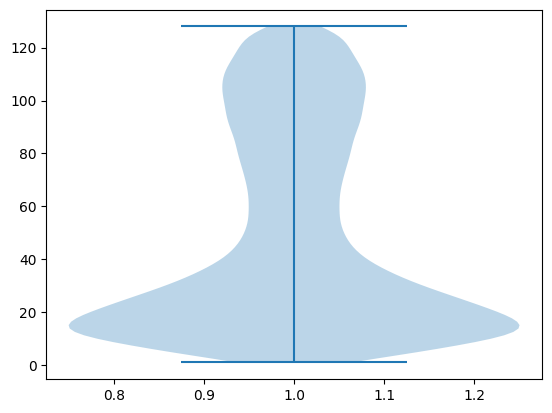

In [28]:
plt.violinplot(final_df["str_len"])
plt.show()

In [29]:
final_df.to_csv(f'{datasetsFilePath}sentiment_data.csv',encoding="UTF8")